# Basics of the study

This study is based on [this article](https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/) from Jason Brownlee. The explanation is great and quite intuitive!

## Importing essential libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras

from sklearn.metrics import mean_squared_error, r2_score

## Importing series

### IPCA (general)  
General IPCA stands for general extended national consumer prices index. Having an overview of it would be useful for better understanding what's in store for the models and then making some adjustments so it becomes easier to work with.

In [20]:
ipca_general = pd.read_csv('Data/IPCA-general.csv', sep=';', decimal=',')
ipca_general.columns = ['Date', 'Variation_Percentage', 'Dropme']
ipca_general = ipca_general.drop('Dropme', axis=1)
ipca_general = ipca_general.set_index('Date')
print(ipca_general.info(),'\n')
print(ipca_general.head())

<class 'pandas.core.frame.DataFrame'>
Index: 528 entries, 1980.01 to 2023.12
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Variation_Percentage  528 non-null    float64
dtypes: float64(1)
memory usage: 8.2+ KB
None 

         Variation_Percentage
Date                         
1980.01              6.615649
1980.02              4.616919
1980.03              6.038389
1980.04              5.286114
1980.05              5.702721


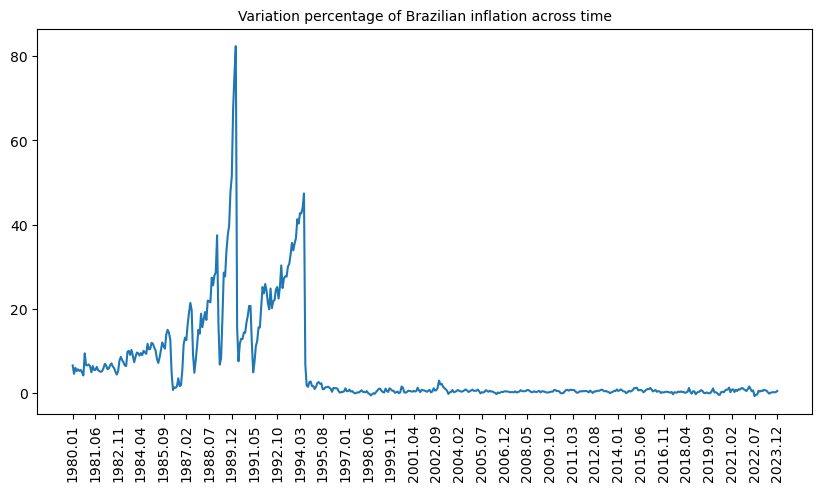

In [21]:
plt.figure(figsize=(10,5))
plt.title('Variation percentage of Brazilian inflation across time', fontsize=10)
plt.plot(ipca_general)
plt.xticks(range(0,len(ipca_general),int(len(ipca_general)/33)+1), rotation=90)
plt.show()

Percentage values scaling from 0 to 100 and beyond might not be particularly helpful for working with a machine learning model, so the series will be divided by 100.

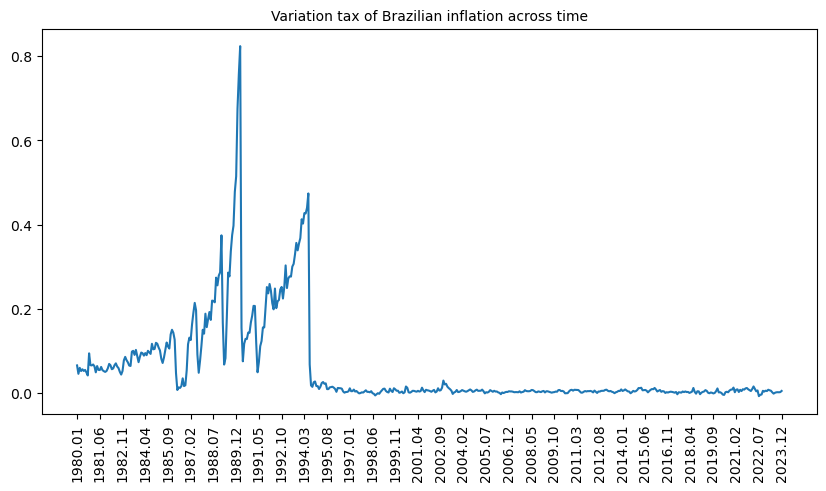

In [22]:
ipca_general_raw = ipca_general.div(100)
plt.figure(figsize=(10,5))
plt.title('Variation tax of Brazilian inflation across time', fontsize=10)
plt.plot(ipca_general_raw)
plt.xticks(range(0,len(ipca_general_raw),int(len(ipca_general_raw)/33)+1), rotation=90)
plt.show()

Now the series can be properly worked with.

### IPCA (food and beverages)  
The inflation of food and beverages might behave differently from general inflation overall, so it might be interesting to analyze it as well.

In [23]:
ipca_food = pd.read_csv('Data/IPCA-food.csv', sep=';', decimal=',')
ipca_food.columns = ['Date', 'Variation_Percentage', 'Dropme']
ipca_food = ipca_food.drop('Dropme', axis=1)
ipca_food = ipca_food.set_index('Date')
print(ipca_food.info(),'\n')
print(ipca_food.head())

<class 'pandas.core.frame.DataFrame'>
Index: 519 entries, 1980.10 to 2023.12
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Variation_Percentage  518 non-null    float64
dtypes: float64(1)
memory usage: 8.1+ KB
None 

         Variation_Percentage
Date                         
1980.10                  5.92
1980.11                 10.97
1980.12                  5.73
1981.01                  6.41
1981.02                  5.34


There's one missing value in the series, so it will be treated as the mean between the neighbor values.

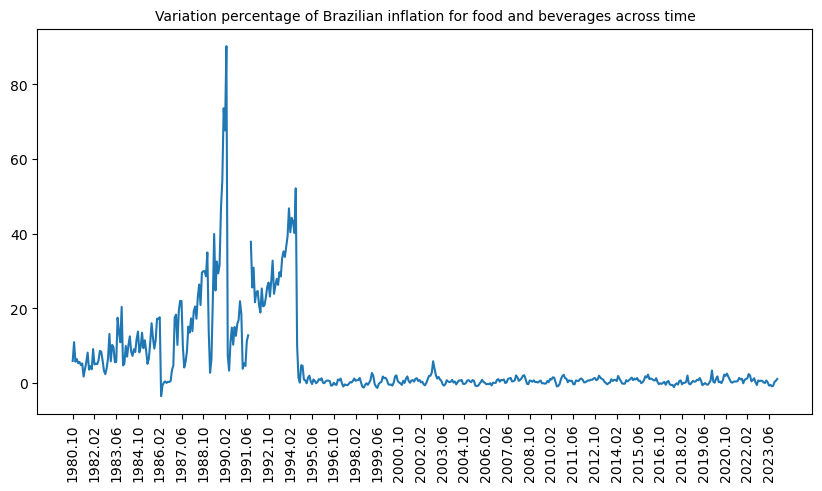

In [24]:
plt.figure(figsize=(10,5))
plt.title('Variation percentage of Brazilian inflation for food and beverages across time', fontsize=10)
plt.plot(ipca_food)
plt.xticks(range(0,len(ipca_food),int(len(ipca_food)/33)+1), rotation=90)
plt.show()

The missing value is between 1991.06 and 1992.10, so it's important to look for it in this slice.

In [25]:
ipca_food['1991.06':'1992.10']

,Variation_Percentage
Date,
1991.06,11.23
1991.07,12.79
1991.08,NaN
1991.09,37.85
1991.10,25.61
1991.11,30.91
1991.12,21.66
1992.01,24.30
1992.02,24.68


In [26]:
ipca_food_notnull = ipca_food.copy()
ipca_food_notnull = ipca_food_notnull.fillna((12.79+37.85)/2)
ipca_food_notnull['1991.06':'1992.10']

,Variation_Percentage
Date,
1991.06,11.23
1991.07,12.79
1991.08,25.32
1991.09,37.85
1991.10,25.61
1991.11,30.91
1991.12,21.66
1992.01,24.30
1992.02,24.68


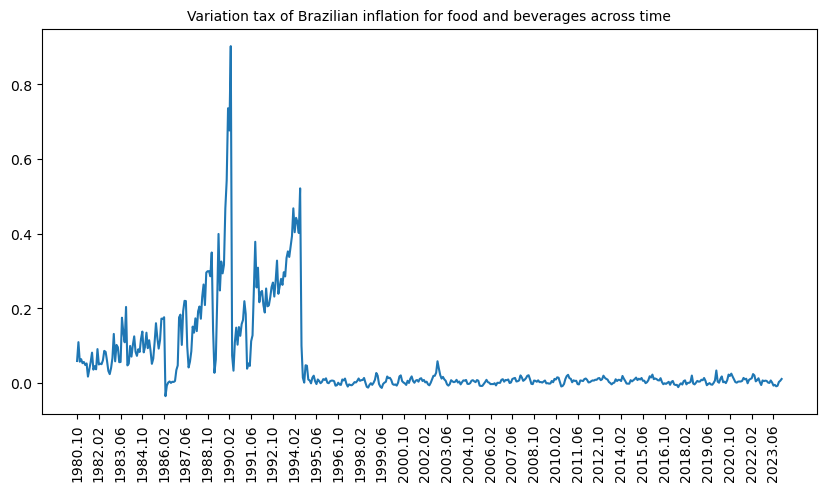

In [27]:
ipca_food_raw = ipca_food_notnull.div(100)
plt.figure(figsize=(10,5))
plt.title('Variation tax of Brazilian inflation for food and beverages across time', fontsize=10)
plt.plot(ipca_food_raw)
plt.xticks(range(0,len(ipca_food_raw),int(len(ipca_food_raw)/33)+1), rotation=90)
plt.show()

### IPCA (health expenses)

In [28]:
ipca_health = pd.read_csv('Data/IPCA-health.csv', sep=';', decimal=',')
ipca_health.columns = ['Date', 'Variation_Percentage', 'Dropme']
ipca_health = ipca_health.drop('Dropme', axis=1)
ipca_health = ipca_health.set_index('Date')
print(ipca_health.info(),'\n')
print(ipca_health.head())

<class 'pandas.core.frame.DataFrame'>
Index: 519 entries, 1980.10 to 2023.12
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Variation_Percentage  518 non-null    float64
dtypes: float64(1)
memory usage: 8.1+ KB
None 

         Variation_Percentage
Date                         
1980.10                  5.90
1980.11                  4.43
1980.12                  3.93
1981.01                  4.38
1981.02                  4.62


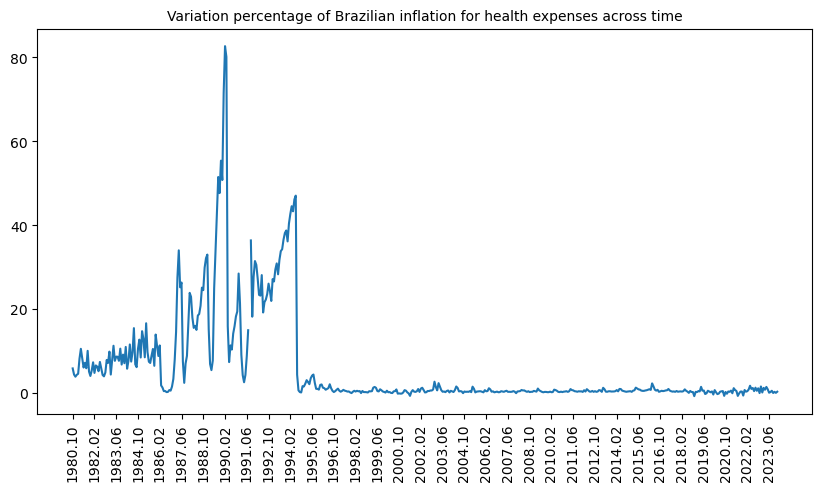

In [29]:
plt.figure(figsize=(10,5))
plt.title('Variation percentage of Brazilian inflation for health expenses across time', fontsize=10)
plt.plot(ipca_health)
plt.xticks(range(0,len(ipca_health),int(len(ipca_health)/33)+1), rotation=90)
plt.show()

In [30]:
ipca_health['1991.06':'1992.10']

,Variation_Percentage
Date,
1991.06,8.87
1991.07,15.00
1991.08,NaN
1991.09,36.40
1991.10,18.23
1991.11,27.68
1991.12,31.49
1992.01,30.57
1992.02,27.33


In [31]:
ipca_health_notnull = ipca_health.copy()
ipca_health_notnull = ipca_health_notnull.fillna((15.00+36.40)/2)
ipca_health_notnull['1991.06':'1992.10']

,Variation_Percentage
Date,
1991.06,8.87
1991.07,15.00
1991.08,25.70
1991.09,36.40
1991.10,18.23
1991.11,27.68
1991.12,31.49
1992.01,30.57
1992.02,27.33


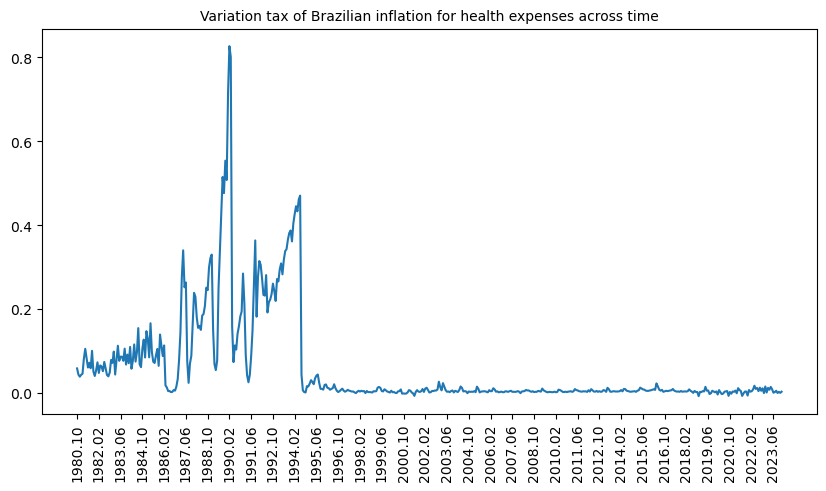

In [32]:
ipca_health_raw = ipca_health_notnull.div(100)
plt.figure(figsize=(10,5))
plt.title('Variation tax of Brazilian inflation for health expenses across time', fontsize=10)
plt.plot(ipca_health_raw)
plt.xticks(range(0,len(ipca_health_raw),int(len(ipca_health_raw)/33)+1), rotation=90)
plt.show()

# LSTM applications

## Standard LSTM

### Split method and model  
Each series must first be split in sequences of steps so they fit the LSTM format. The method used for Standard LSTM can also be used for a Stacked LSTM without any changes.  
Since the data is in months, the model itself will use 12 timesteps, assembling a batch of one year to predict the following month.

In [33]:
# The series must first be prepared to fit the type of LSTM.
# This method can be used for both Standard and Stacked LSTMs.
def split_standard(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

### IPCA (general)

In [34]:
X_IPCAgen_std, y_IPCAgen_std = split_standard(np.array(ipca_general_raw), n_steps_std)
# Reshape from [samples, timesteps] into [samples, timesteps, features]
X_IPCAgen_std = X_IPCAgen_std.reshape((X_IPCAgen_std.shape[0], X_IPCAgen_std.shape[1], n_features_std))

# Separating values in training, validation and testing
# 70% of the series will be used for testing
Xtrain_IPCAgen_std = X_IPCAgen_std[:int(len(X_IPCAgen_std)*0.7)]
ytrain_IPCAgen_std = y_IPCAgen_std[:int(len(y_IPCAgen_std)*0.7)]
# 20% of the series will be used for validation
Xval_IPCAgen_std = X_IPCAgen_std[int(len(X_IPCAgen_std)*0.7):int(len(X_IPCAgen_std)*0.9)]
yval_IPCAgen_std = y_IPCAgen_std[int(len(y_IPCAgen_std)*0.7):int(len(y_IPCAgen_std)*0.9)]
# 10% of the series will be used for testing
Xtest_IPCAgen_std = X_IPCAgen_std[int(len(X_IPCAgen_std)*0.9):]
ytest_IPCAgen_std = y_IPCAgen_std[int(len(y_IPCAgen_std)*0.9):]

In [35]:
# This model will use 12 timesteps, one for each month in a year, and a single feature.
n_steps_std = 12
n_features_std = 1

lstm_IPCAgen_std = keras.models.Sequential()
lstm_IPCAgen_std.add(keras.layers.LSTM(50, activation='relu', input_shape=(n_steps_std, n_features_std)))
lstm_IPCAgen_std.add(keras.layers.Dense(1))
lstm_IPCAgen_std.compile(optimizer='adam', loss='mse')
lstm_IPCAgen_std.fit(Xtrain_IPCAgen_std, ytrain_IPCAgen_std, 
                     validation_data=(Xval_IPCAgen_std, yval_IPCAgen_std),
                     epochs=200, verbose=1)

Epoch 1/200
12/12 [==============================] - 8s 119ms/step - loss: 0.0165 - val_loss: 0.0023
Epoch 2/200
12/12 [==============================] - 0s 18ms/step - loss: 0.0102 - val_loss: 0.0042
Epoch 3/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0081 - val_loss: 0.0013
Epoch 4/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0066 - val_loss: 3.0516e-04
Epoch 5/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0059 - val_loss: 1.8688e-04
Epoch 6/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0057 - val_loss: 1.0385e-04
Epoch 7/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0052 - val_loss: 2.7373e-05
Epoch 8/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0050 - val_loss: 1.7604e-05
Epoch 9/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0048 - val_loss: 4.0608e-05
Epoch 10/200
12/12 [==============================] - 0s 15ms/step - loss: 

12/12 [==============================] - 0s 3ms/step


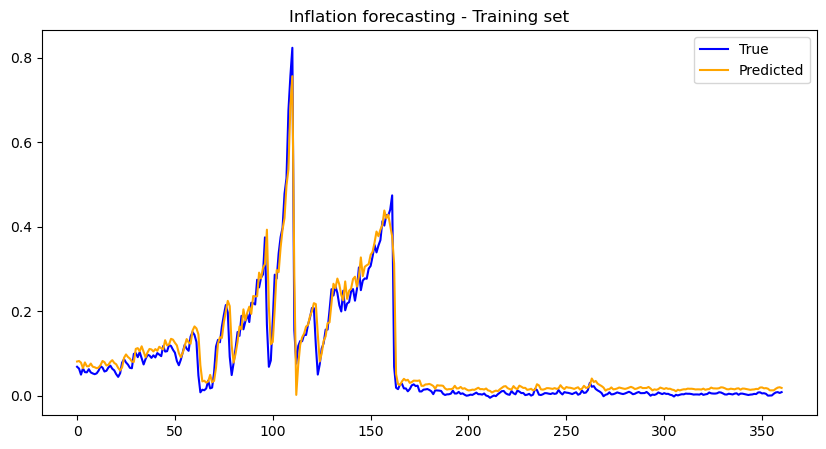

In [36]:
plt.figure(figsize=(10,5))
plt.title('Inflation forecasting - Training set')
plt.plot(ytrain_IPCAgen_std, color='blue', label='True')
plt.plot(lstm_IPCAgen_std.predict(Xtrain_IPCAgen_std), color='orange', label='Predicted')
plt.legend()
plt.show()

4/4 [==============================] - 0s 6ms/step


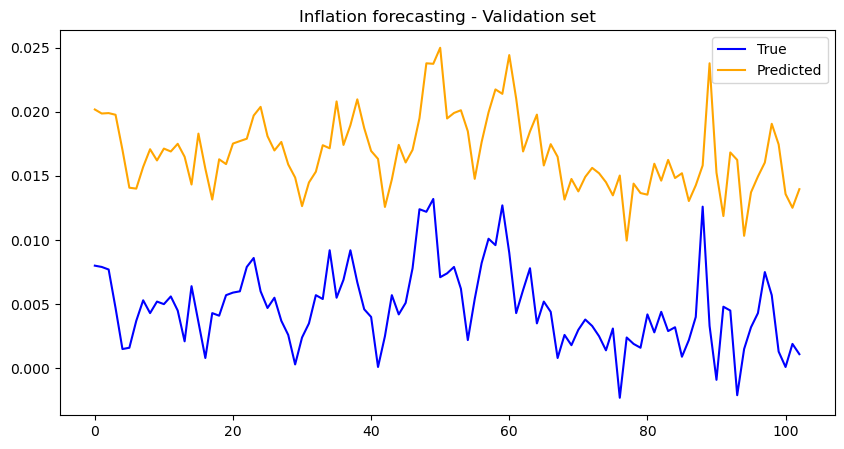

In [37]:
plt.figure(figsize=(10,5))
plt.title('Inflation forecasting - Validation set')
plt.plot(yval_IPCAgen_std, color='blue', label='True')
plt.plot(lstm_IPCAgen_std.predict(Xval_IPCAgen_std), color='orange', label='Predicted')
plt.legend()
plt.show()

2/2 [==============================] - 0s 6ms/step


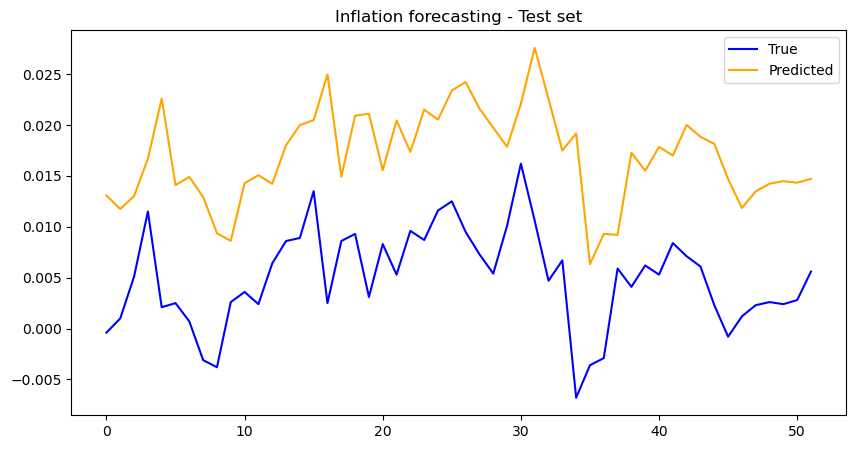

In [38]:
plt.figure(figsize=(10,5))
plt.title('Inflation forecasting - Test set')
plt.plot(ytest_IPCAgen_std, color='blue', label='True')
plt.plot(lstm_IPCAgen_std.predict(Xtest_IPCAgen_std), color='orange', label='Predicted')
plt.legend()
plt.show()

17/17 [==============================] - 0s 4ms/step


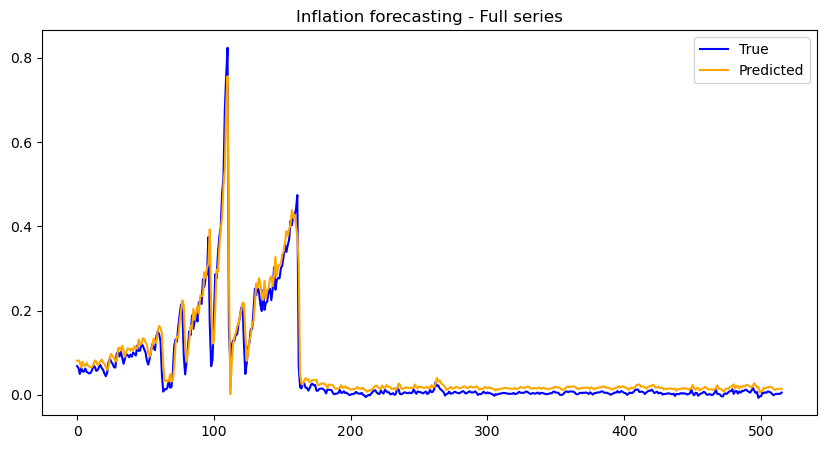

In [39]:
plt.figure(figsize=(10,5))
plt.title('Inflation forecasting - Full series')
plt.plot(y_IPCAgen_std, color='blue', label='True')
plt.plot(lstm_IPCAgen_std.predict(X_IPCAgen_std), color='orange', label='Predicted')
plt.legend()
plt.show()

### IPCA (food)

In [40]:
X_IPCAfood_std, y_IPCAfood_std = split_standard(np.array(ipca_food_raw), n_steps_std)
# Reshape from [samples, timesteps] into [samples, timesteps, features]
X_IPCAfood_std = X_IPCAfood_std.reshape((X_IPCAfood_std.shape[0], X_IPCAfood_std.shape[1], n_features_std))

# Separating values in training, validation and testing
# 70% of the series will be used for testing
Xtrain_IPCAfood_std = X_IPCAfood_std[:int(len(X_IPCAfood_std)*0.7)]
ytrain_IPCAfood_std = y_IPCAfood_std[:int(len(y_IPCAfood_std)*0.7)]
# 20% of the series will be used for validation
Xval_IPCAfood_std = X_IPCAfood_std[int(len(X_IPCAfood_std)*0.7):int(len(X_IPCAfood_std)*0.9)]
yval_IPCAfood_std = y_IPCAfood_std[int(len(y_IPCAfood_std)*0.7):int(len(y_IPCAfood_std)*0.9)]
# 10% of the series will be used for testing
Xtest_IPCAfood_std = X_IPCAfood_std[int(len(X_IPCAfood_std)*0.9):]
ytest_IPCAfood_std = y_IPCAfood_std[int(len(y_IPCAfood_std)*0.9):]

In [41]:
# This model will use 12 timesteps, one for each month in a year, and a single feature.
n_steps_std = 12
n_features_std = 1

lstm_IPCAfood_std = keras.models.Sequential()
lstm_IPCAfood_std.add(keras.layers.LSTM(50, activation='relu', input_shape=(n_steps_std, n_features_std)))
lstm_IPCAfood_std.add(keras.layers.Dense(1))
lstm_IPCAfood_std.compile(optimizer='adam', loss='mse')
lstm_IPCAfood_std.fit(Xtrain_IPCAfood_std, ytrain_IPCAfood_std, 
                      validation_data=(Xval_IPCAfood_std, yval_IPCAfood_std),
                      epochs=200, verbose=1)

Epoch 1/200
12/12 [==============================] - 5s 166ms/step - loss: 0.0168 - val_loss: 0.0018
Epoch 2/200
12/12 [==============================] - 0s 23ms/step - loss: 0.0108 - val_loss: 0.0030
Epoch 3/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0087 - val_loss: 9.1485e-04
Epoch 4/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0069 - val_loss: 2.5104e-04
Epoch 5/200
12/12 [==============================] - 0s 19ms/step - loss: 0.0062 - val_loss: 8.1407e-05
Epoch 6/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0061 - val_loss: 5.6674e-05
Epoch 7/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0058 - val_loss: 4.7621e-05
Epoch 8/200
12/12 [==============================] - 0s 26ms/step - loss: 0.0063 - val_loss: 7.0526e-05
Epoch 9/200
12/12 [==============================] - 0s 31ms/step - loss: 0.0059 - val_loss: 3.5107e-04
Epoch 10/200
12/12 [==============================] - 0s 22ms/step - lo

12/12 [==============================] - 1s 4ms/step


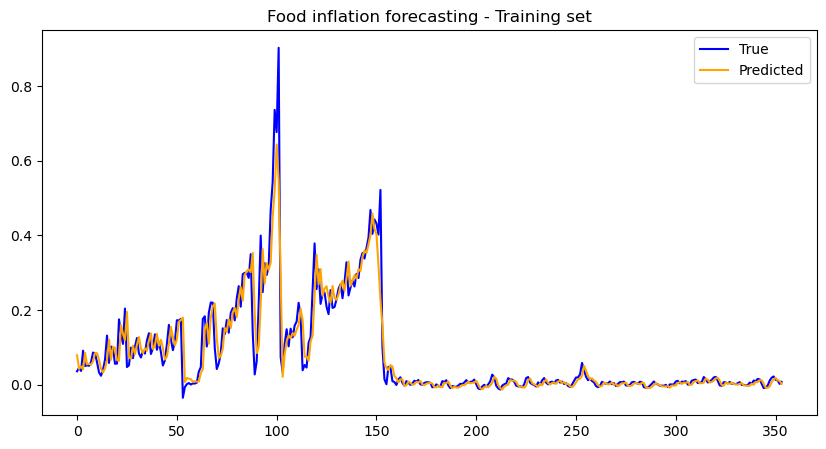

In [42]:
plt.figure(figsize=(10,5))
plt.title('Food inflation forecasting - Training set')
plt.plot(ytrain_IPCAfood_std, color='blue', label='True')
plt.plot(lstm_IPCAfood_std.predict(Xtrain_IPCAfood_std), color='orange', label='Predicted')
plt.legend()
plt.show()

4/4 [==============================] - 0s 4ms/step


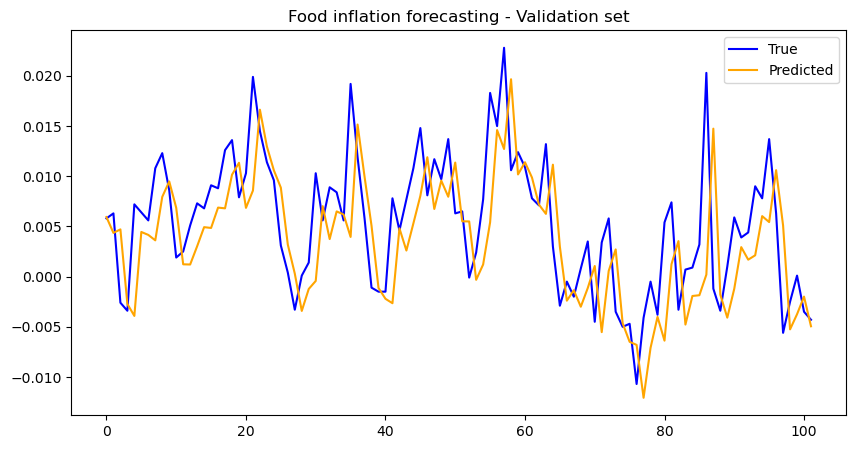

In [43]:
plt.figure(figsize=(10,5))
plt.title('Food inflation forecasting - Validation set')
plt.plot(yval_IPCAfood_std, color='blue', label='True')
plt.plot(lstm_IPCAfood_std.predict(Xval_IPCAfood_std), color='orange', label='Predicted')
plt.legend()
plt.show()

2/2 [==============================] - 0s 5ms/step


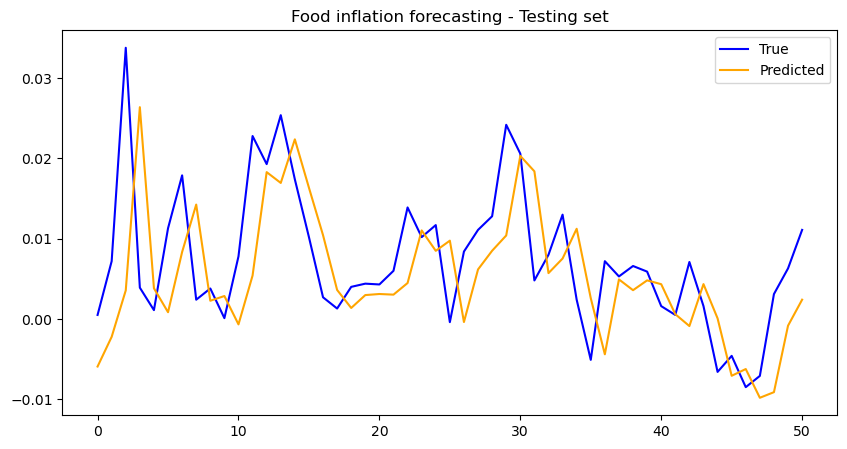

In [44]:
plt.figure(figsize=(10,5))
plt.title('Food inflation forecasting - Testing set')
plt.plot(ytest_IPCAfood_std, color='blue', label='True')
plt.plot(lstm_IPCAfood_std.predict(Xtest_IPCAfood_std), color='orange', label='Predicted')
plt.legend()
plt.show()

16/16 [==============================] - 0s 3ms/step


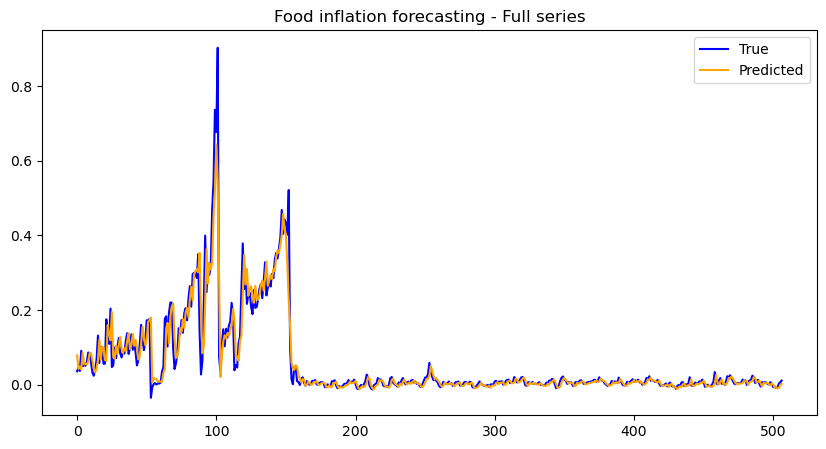

In [45]:
plt.figure(figsize=(10,5))
plt.title('Food inflation forecasting - Full series')
plt.plot(y_IPCAfood_std, color='blue', label='True')
plt.plot(lstm_IPCAfood_std.predict(X_IPCAfood_std), color='orange', label='Predicted')
plt.legend()
plt.show()

### IPCA (health)

In [46]:
X_IPCAhlth_std, y_IPCAhlth_std = split_standard(np.array(ipca_health_raw), n_steps_std)
# Reshape from [samples, timesteps] into [samples, timesteps, features]
X_IPCAhlth_std = X_IPCAhlth_std.reshape((X_IPCAhlth_std.shape[0], X_IPCAhlth_std.shape[1], n_features_std))

# Separating values in training, validation and testing
# 70% of the series will be used for testing
Xtrain_IPCAhlth_std = X_IPCAhlth_std[:int(len(X_IPCAhlth_std)*0.7)]
ytrain_IPCAhlth_std = y_IPCAhlth_std[:int(len(y_IPCAhlth_std)*0.7)]
# 20% of the series will be used for validation
Xval_IPCAhlth_std = X_IPCAhlth_std[int(len(X_IPCAhlth_std)*0.7):int(len(X_IPCAhlth_std)*0.9)]
yval_IPCAhlth_std = y_IPCAhlth_std[int(len(y_IPCAhlth_std)*0.7):int(len(y_IPCAhlth_std)*0.9)]
# 10% of the series will be used for testing
Xtest_IPCAhlth_std = X_IPCAhlth_std[int(len(X_IPCAhlth_std)*0.9):]
ytest_IPCAhlth_std = y_IPCAhlth_std[int(len(y_IPCAhlth_std)*0.9):]

In [47]:
# This model will use 12 timesteps, one for each month in a year, and a single feature.
n_steps_std = 12
n_features_std = 1

lstm_IPCAhlth_std = keras.models.Sequential()
lstm_IPCAhlth_std.add(keras.layers.LSTM(50, activation='relu', input_shape=(n_steps_std, n_features_std)))
lstm_IPCAhlth_std.add(keras.layers.Dense(1))
lstm_IPCAhlth_std.compile(optimizer='adam', loss='mse')
lstm_IPCAhlth_std.fit(Xtrain_IPCAhlth_std, ytrain_IPCAhlth_std, 
                      validation_data=(Xval_IPCAhlth_std, yval_IPCAhlth_std),
                      epochs=200, verbose=1)

Epoch 1/200
12/12 [==============================] - 4s 56ms/step - loss: 0.0179 - val_loss: 0.0015
Epoch 2/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0107 - val_loss: 0.0018
Epoch 3/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0080 - val_loss: 4.1183e-04
Epoch 4/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0069 - val_loss: 2.8609e-05
Epoch 5/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0068 - val_loss: 6.3177e-05
Epoch 6/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0064 - val_loss: 1.4361e-04
Epoch 7/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0065 - val_loss: 1.3143e-04
Epoch 8/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0064 - val_loss: 4.7370e-04
Epoch 9/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0061 - val_loss: 8.7348e-05
Epoch 10/200
12/12 [==============================] - 0s 14ms/step - los

12/12 [==============================] - 1s 9ms/step


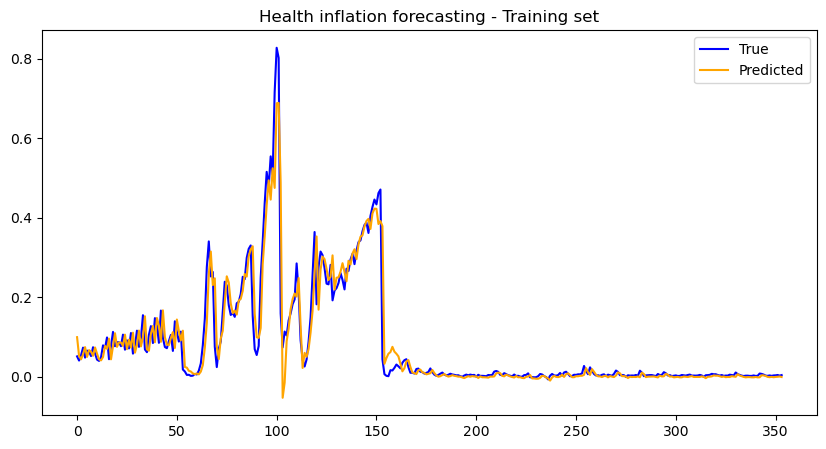

In [48]:
plt.figure(figsize=(10,5))
plt.title('Health inflation forecasting - Training set')
plt.plot(ytrain_IPCAhlth_std, color='blue', label='True')
plt.plot(lstm_IPCAhlth_std.predict(Xtrain_IPCAhlth_std), color='orange', label='Predicted')
plt.legend()
plt.show()

4/4 [==============================] - 0s 13ms/step


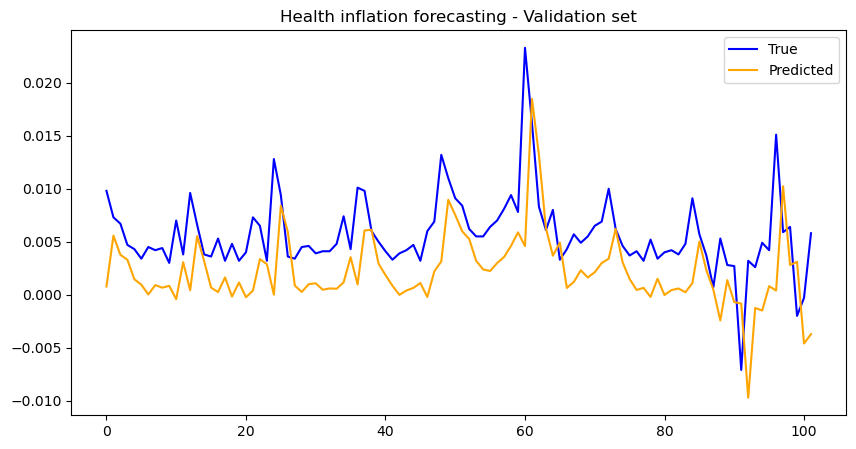

In [49]:
plt.figure(figsize=(10,5))
plt.title('Health inflation forecasting - Validation set')
plt.plot(yval_IPCAhlth_std, color='blue', label='True')
plt.plot(lstm_IPCAhlth_std.predict(Xval_IPCAhlth_std), color='orange', label='Predicted')
plt.legend()
plt.show()

4/4 [==============================] - 0s 12ms/step


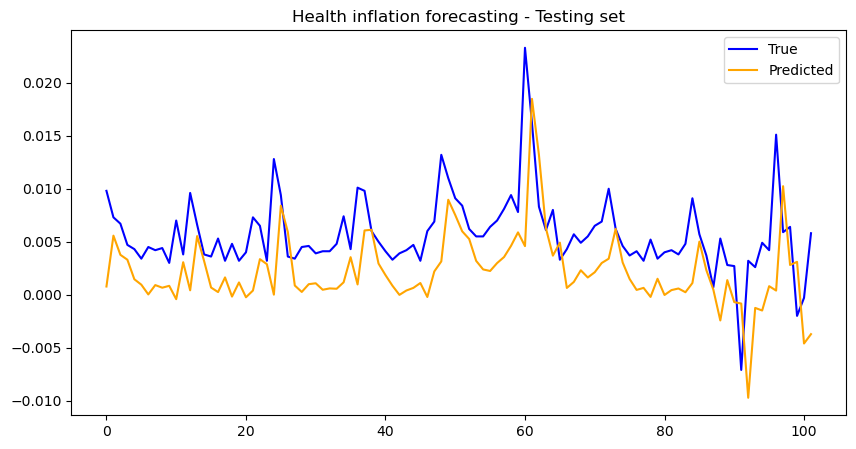

In [50]:
plt.figure(figsize=(10,5))
plt.title('Health inflation forecasting - Testing set')
plt.plot(yval_IPCAhlth_std, color='blue', label='True')
plt.plot(lstm_IPCAhlth_std.predict(Xval_IPCAhlth_std), color='orange', label='Predicted')
plt.legend()
plt.show()

16/16 [==============================] - 0s 8ms/step


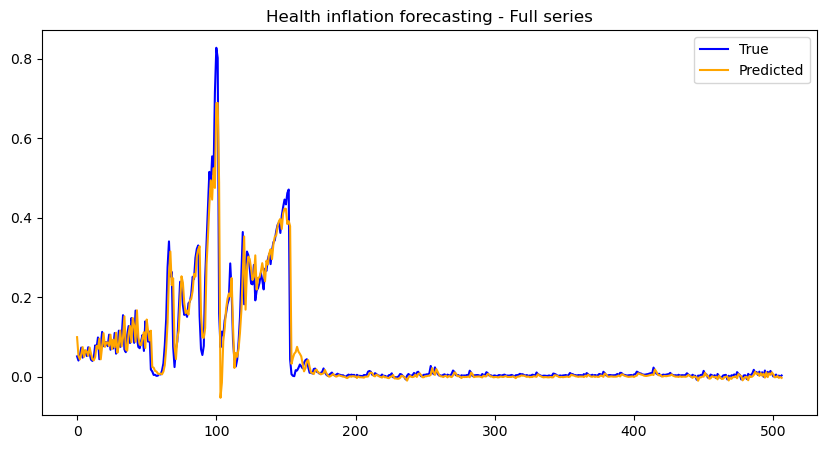

In [51]:
plt.figure(figsize=(10,5))
plt.title('Health inflation forecasting - Full series')
plt.plot(y_IPCAhlth_std, color='blue', label='True')
plt.plot(lstm_IPCAhlth_std.predict(X_IPCAhlth_std), color='orange', label='Predicted')
plt.legend()
plt.show()

## Stacked LSTM

### IPCA (general)

## CNN LSTM

### IPCA (general)